# Testing Blur and Edges filter on transistors pictures


## 1) Introduction

The goal of this notebook is to test the edges, and gaussian filter to known or to see if we can juste pass it to the U-net because it detects morep rcisely the features or can we combine them and make a 3D array coressponding to img (L, Edges, Blur) and see how can he affect  the accuracy of the U-net.

## 2) Experiments

### A) Load the librairies and setting the configuration

In [21]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
from PIL import Image


In [22]:
path_dataset_folder = "/content/drive/MyDrive/Dataset/transistor"
path_train_pcitures = "test/good/000.png"
full_path_pictures = os.path.join(path_dataset_folder, path_train_pcitures)
print(full_path_pictures)

/content/drive/MyDrive/Dataset/transistor/test/good/000.png


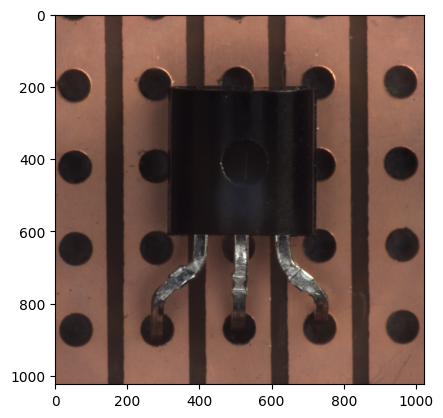

In [23]:
img = Image.open(full_path_pictures)
fig,ax = plt.subplots()
ax.imshow(img)
plt.show()

Conclusion: We can perfectly see the pictures, so the configuration are ready for the test

### B) Using Edges, Gaussian, and Edges + Gaussian

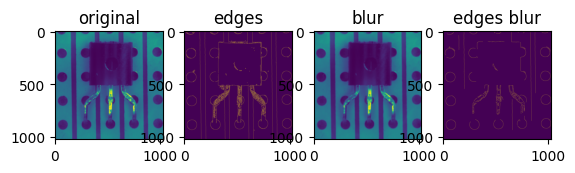

In [58]:
img_arr = np.array(img.convert("L"))
#applicate a blur
blur_img = cv2.GaussianBlur(img_arr,
                            (7,7),#must be odd
                            sigmaX = 8.0,
                            sigmaY = 8.0
                            )
edges_img = cv2.Canny(
    img_arr,
    0,
    100
    )
edges_img_blur = cv2.Canny(
    blur_img,
    0,
    100
    )

fig,ax = plt.subplots(1,4)
ax[0].imshow(img)
ax[0].set_title("original")
ax[1].imshow(edges_img)
ax[1].set_title("edges")
ax[2].imshow(blur_img)
ax[2].set_title("blur")
ax[3].imshow(edges_img_blur)
ax[3].set_title("edges blur")
plt.show()

In [42]:
path_dataset_folder = "/content/drive/MyDrive/Dataset/transistor/test"
name_pictures = "001.png"
name_folder = [folder for folder in os.listdir(path_dataset_folder) if not folder.endswith("txt")]
print(name_folder)
pictures_path = [os.path.join(path_dataset_folder,path, name_pictures)
                 for path in name_folder]
print(pictures_path)

['/content/drive/MyDrive/Dataset/transistor/test/damaged_case/001.png', '/content/drive/MyDrive/Dataset/transistor/test/cut_lead/001.png', '/content/drive/MyDrive/Dataset/transistor/test/bent_lead/001.png', '/content/drive/MyDrive/Dataset/transistor/test/misplaced/001.png', '/content/drive/MyDrive/Dataset/transistor/test/good/001.png']


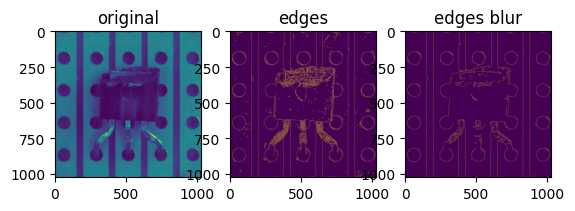

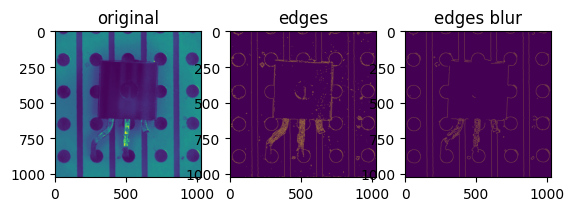

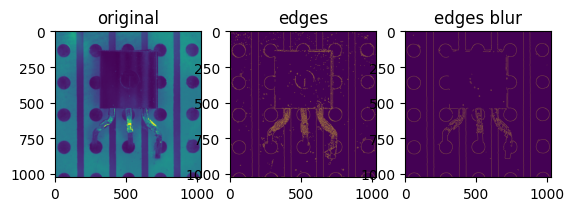

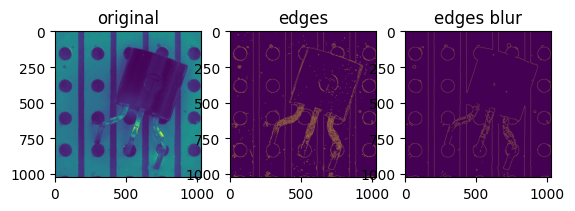

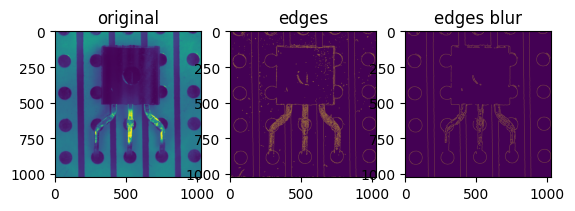

In [60]:
nb_pictures = len(pictures_path)
img_arr_list = []
edges_img_list = []
edges_img_blur_list = []
for path in pictures_path:
  img = Image.open(path).convert("L")
  img_arr = np.array(img)
  img_arr_list.append(img_arr)
  edges_img = cv2.Canny(img_arr, 30, 40)
  edges_img_list.append(edges_img)
  blur_img = cv2.GaussianBlur(img_arr, (7,7),sigmaX = 4.0,sigmaY = 4.0)
  edges_img_blur = cv2.Canny(blur_img, 30, 40)
  edges_img_blur_list.append(edges_img_blur)

for x,y,z in zip(img_arr_list,edges_img_list, edges_img_blur_list):
  fig,ax = plt.subplots(1,3)
  ax[0].imshow(x)
  ax[0].set_title("original")
  ax[1].imshow(y)
  ax[1].set_title("edges")
  ax[2].imshow(z)
  ax[2].set_title("edges blur")
  plt.show()


Conclusion

Using edge maps alone introduces significant noise, particularly around the transistor leads, where fine structural details generate strong edge responses. This noise can negatively impact the stability of the reconstruction.

However, when edge maps are combined with Gaussian-blurred or grayscale representations, the noise is significantly reduced. The Gaussian blur smooths high-frequency variations while preserving the overall structure, resulting in more coherent edge information and improved feature representation.


In [50]:
print(f"dimension de l'array de l'image normal -> {img_arr_list[0].shape}")
print(f"dimension de l'array de l'image edges -> {edges_img_list[0].shape}")

dimension de l'array de l'image normal -> (1024, 1024)
dimension de l'array de l'image edges -> (1024, 1024)


But the problem here is the pictures blur, L, and edges are 2 array, so we can not stack this together using brute force because this will result in 6D Array.

In [65]:
def stack_array_pictures(
    img_one: np.ndarray,
    img_two: np.ndarray,
    img_three: np.ndarray,
    axis: int = 0
) -> np.ndarray:
     """
    Combine three 2D arrays into a single 3D array.

    Args:
        img_one, img_two, img_three: 2D arrays of shape (H, W)
        axis: axis to stack along, default 0 → (C, H, W)

    Returns:
        3D numpy array of shape (3, H, W) if axis=0
    """

    assert img_one.shape == img_two.shape == img_three.shape, \
        "All input arrays must have the same shape"

    assert img_one.ndim == 2, \
        "Input arrays must be 2D (H, W)"

    x = np.stack([img_one, img_two, img_three], axis=axis)
    return x

In [67]:
new_array = stack_array_pictures(img_arr_list[0],edges_img_list[0],edges_img_blur_list[0])
print(f"dimension de l'array de l'image normal -> {new_array.shape}")

dimension de l'array de l'image normal -> (3, 1024, 1024)
